## Домашнее задание 5. Дизайн антитела, гуманизация

Из [PDB](https://www.rcsb.org) скачиваем белковые последовательности лёгкой и тяжёлой цепей мышиного антитела с PDB ID 3MBX.

In [ ]:
from Bio import SeqIO

records = list(SeqIO.parse("mouse_ab.fasta", "fasta"))
print('Тяжёлая цепь:', records[0].seq, 'Лёгкая цепь:', records[1].seq, sep='\n')

Тяжёлая цепь:
QVTLKESGPGILQPSQTLSLTCSFSGFSLSTYGMGVGWIRQPSGKGLEWLAHIWWDDVKRYNPALKSRLTISKDTSGSQVFLKIASVDTSDTATYYCARMGSDYDVWFDYWGQGTLVTVSAASTKGPSVFPLAPSSKSTSGGTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQSSGLYSLSSVVTVPSSSLGTQTYICNVNHKPSNTKVDKKVEPKSCHHHHHH
Лёгкая цепь:
DIVMSQSPSSLAVSVGEKVTMSCKSSQSLLYNNNQKNYLAWYQQKPGQSPKLLIYWASTRESGVPDRFTGSGSGTDFTLTISSVKAEDLAVYYCQQYYSYPFTFGSGTKLEIKRADAAPTVSIFPPSSEQLTSGGASVVCFLNNFYPRDINVKWKIDGSERQNGVLNSWTDQDSKDSTYSMSSTLTLTKDEYERHNSYTCEATHKTSTSPIVKSFNRNEC


Для выделения вариабельных доменов используем [SAbDab](https://opig.stats.ox.ac.uk/webapps/sabdab-sabpred/sabdab/structureviewer/?pdb=3mbx#chains).

In [9]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

sequences = [SeqRecord(
    Seq("EVTLKESGPGILQPSQTLSLTCSFSGFSLSTYGMGVGWIRQPSGKGLEWLAHIWWDDVKRYNPALKSRLTISKDTSGSQVFLKIASVDTSDTATYYCARMGSDYDVWFDYWGQGTLVTVS"), 
    id="VH_mouse"),
    SeqRecord(
    Seq("DIVMSQSPSSLAVSVGEKVTMSCKSSQSLLYNNNQKNYLAWYQQKPGQSPKLLIYWASTRESGVPDRFTGSGSGTDFTLTISSVKAEDLAVYYCQQYYSYPFTFGSGTKLEIK"), 
    id="VL_mouse")]
with open("mouse_Fv.fasta", "w") as output_handle:
    SeqIO.write(sequences, output_handle, "fasta")
output_handle.close()

Для моделирования Fv-участка антитела используем сервис SAbPred [ABodyBuilder2](https://opig.stats.ox.ac.uk/webapps/sabdab-sabpred/sabpred/abodybuilder/).

![alt text](image.png)
Результаты: https://opig.stats.ox.ac.uk/webapps/sabdab-sabpred/sabpred/abodybuilder2_results/viewer/20251208_0643797/.

In [7]:
import py3Dmol as p3d

view = p3d.view()
view.addModel(open('mouse_fv_model.pdb', 'r').read(),'pdb')
view.setBackgroundColor('white')
view.setStyle({'chain':'H'}, {'cartoon': {'color':'purple'}})
view.setStyle({'chain':'L'}, {'cartoon': {'color':'green'}})
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Human framework: [DomainGapAlign](http://imgt.org/3Dstructure-DB/cgi/DomainGapAlign.cgi) \ IgBLAST:
VH: 
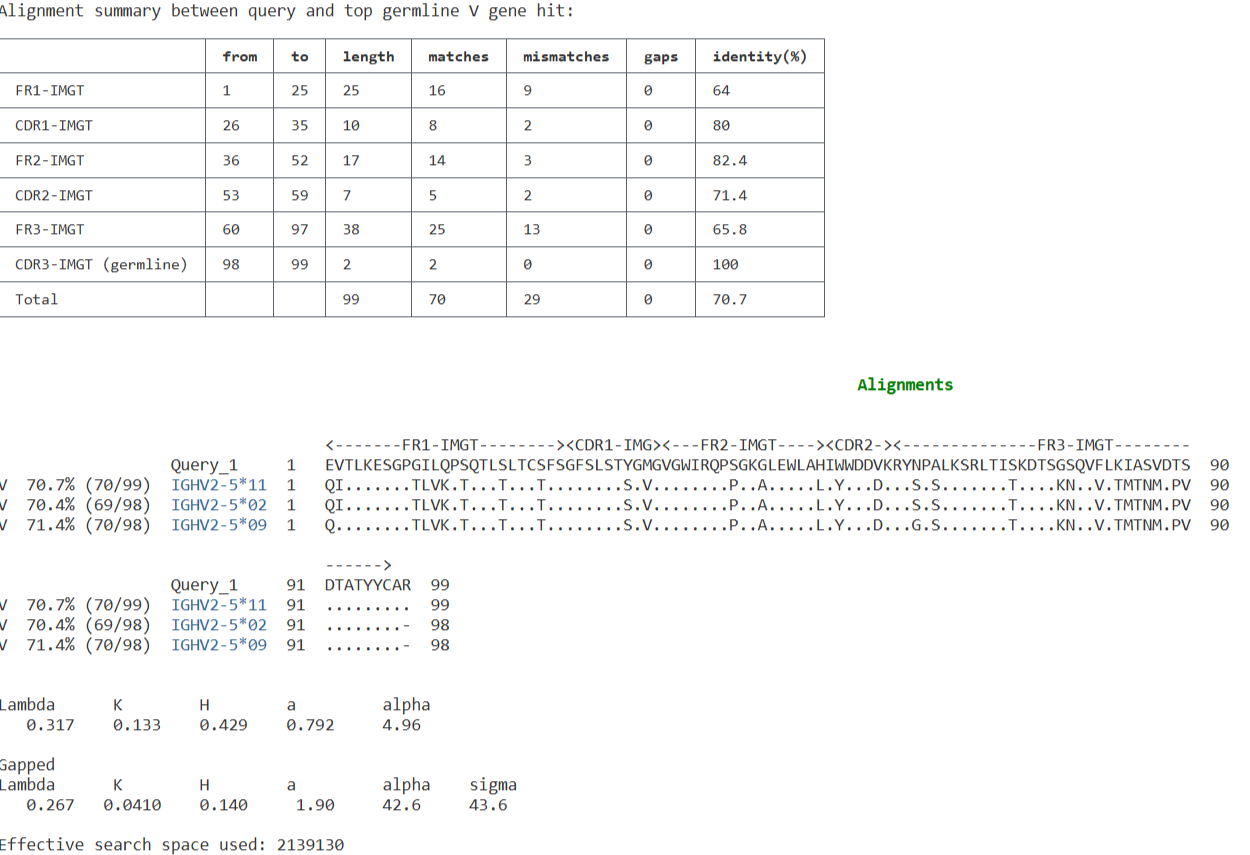

VL:
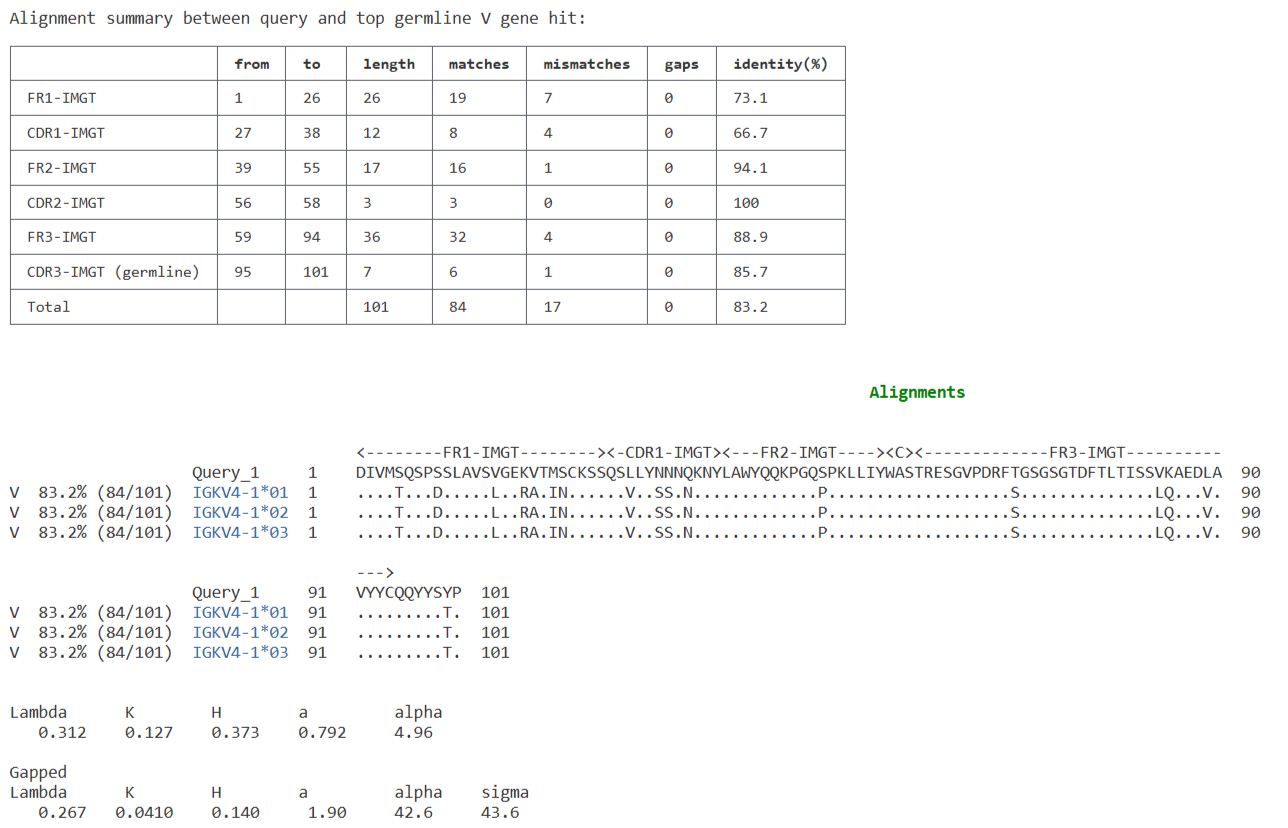

Заменяем в pymol остатки

Swiss-PDBViewer: минимизация энергии (после мутации каждого остатка и после всех изменений)

Мы получили гуманизированное антитело!